In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from scipy.ndimage import filters
import matplotlib.pyplot as plt
import random
from scipy import linalg
import sys
import math
from scipy import signal

# Image segmentation

IMAGE -  hinge.pnm
Threshold -  12


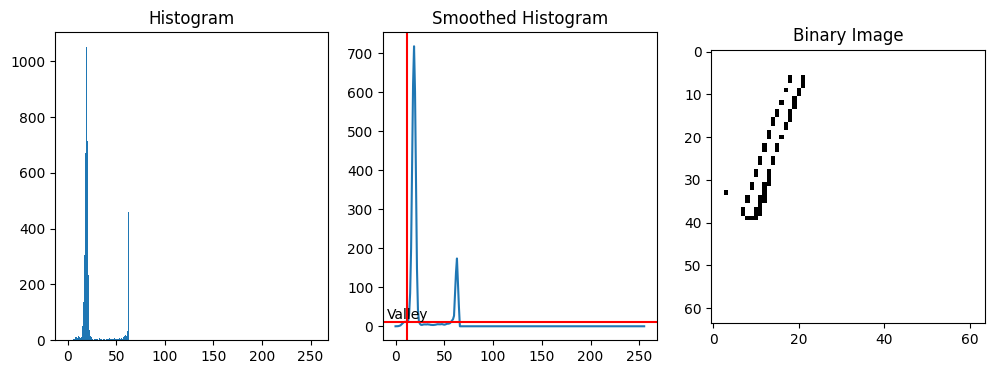


IMAGE -  hinges.pnm
Threshold -  23


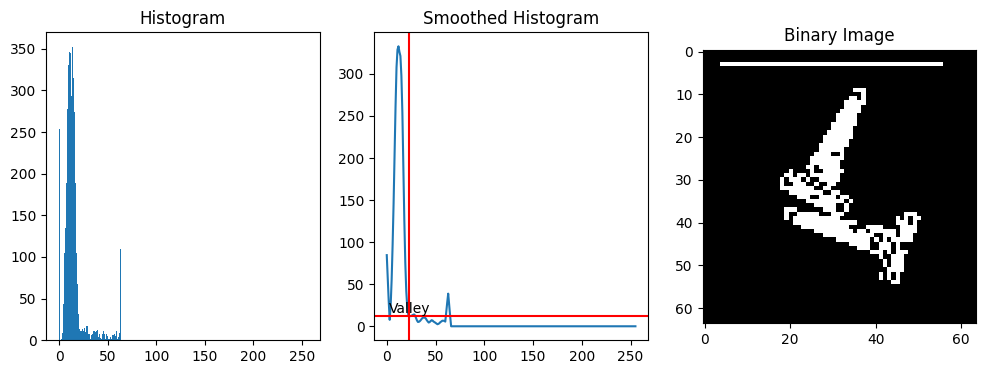


IMAGE -  shapes1.pnm
Threshold -  60


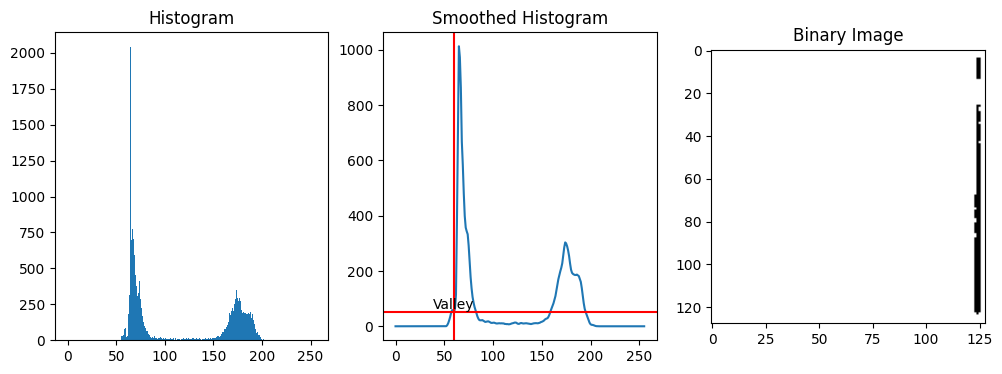


IMAGE -  shapes2.pnm
Threshold -  68


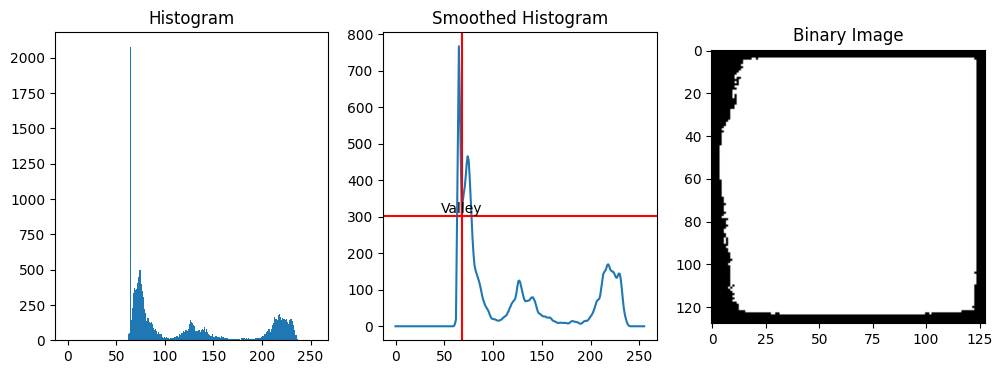


IMAGE -  shapes3.pnm
Threshold -  68


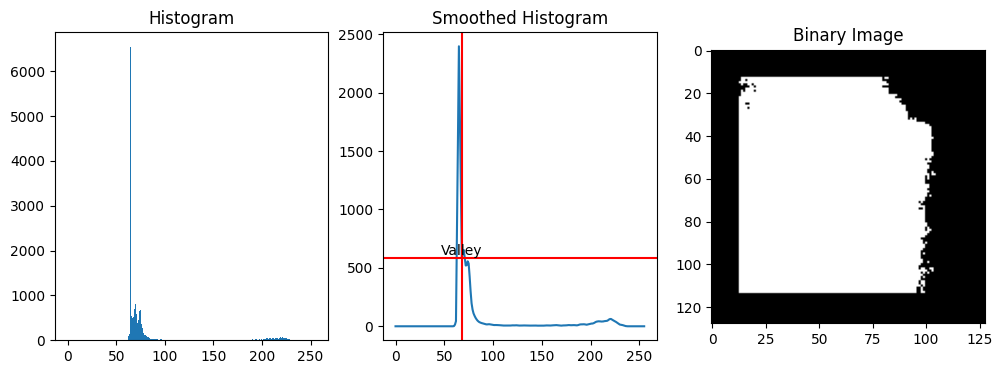


IMAGE -  shapes4.pnm
Threshold -  95


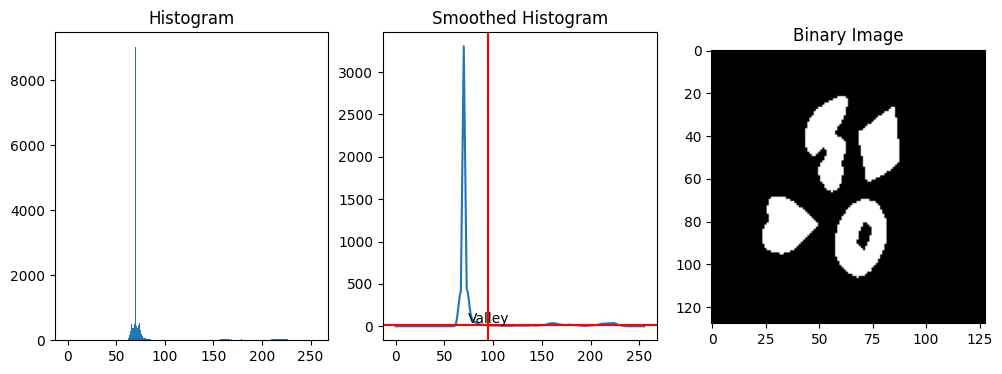


IMAGE -  pillsetc.pnm
Threshold -  110


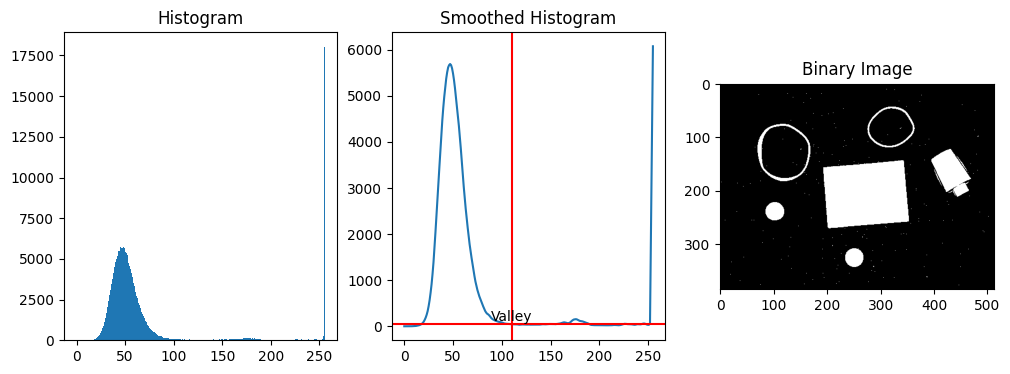

In [ ]:
def image_segmentation(img):
    # Compute the histogram of the image intensities
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    bins = list(bins)

    # Smooth the histogram using a 1D averaging mask
    mask = np.array([1, 2, 3, 2, 1])/9.0
    smooth_hist = np.convolve(hist, mask, mode='same')

    # Find the two highest peaks in the smoothed histogram
    peaks, _ = signal.find_peaks(smooth_hist)

    # Find the valley between the two peaks
    valley_index = np.argmin(smooth_hist[peaks[0]:peaks[1]]) + peaks[0]
    valley_threshold = bins[valley_index]

    # Choose the threshold value as the intensity value at the valley location
    threshold = valley_index
    print("Threshold - ", threshold)

    # Create the binary image
    binary_img = np.zeros_like(img)
    binary_img[img >= threshold] = 1

    # Display the results
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
    ax1.bar(bins[:-1], hist, width=1.0, edgecolor='none')
    ax1.set_title('Histogram')
    ax2.plot(smooth_hist)
    ax2.set_title('Smoothed Histogram')
    ax2.axvline(valley_index, color='r')
    ax2.axhline(smooth_hist[valley_index], color='r')
    ax2.text(valley_index, smooth_hist[valley_index], 'Valley', ha='center', va='bottom')
    ax3.imshow(binary_img, cmap='gray')
    ax3.set_title('Binary Image')
    plt.show()

    return binary_img


images = ["hinge.pnm","hinges.pnm","shapes1.pnm","shapes2.pnm","shapes3.pnm","shapes4.pnm","pillsetc.pnm"]

for image in images:
    print("IMAGE - ", image)
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    binary = image_segmentation(img)
    print()


# Component Analysis

IMAGE -  hinge.pnm
Threshold -  12


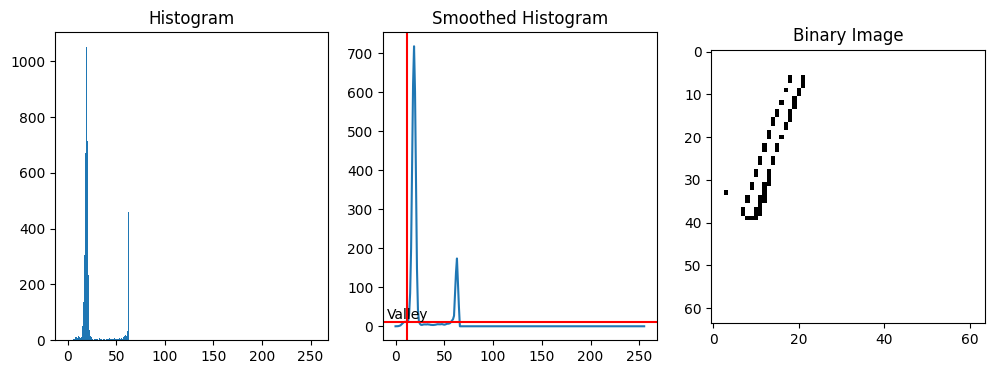

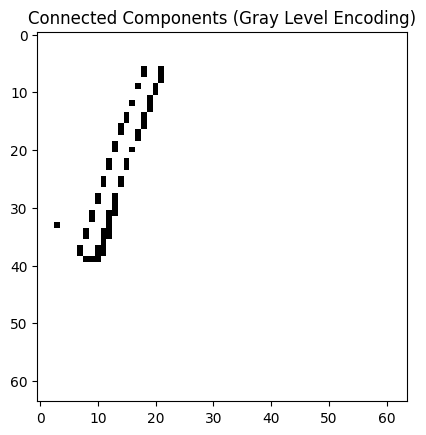

Gray Level to Component Mapping: {1: 1}




IMAGE -  hinges.pnm
Threshold -  23


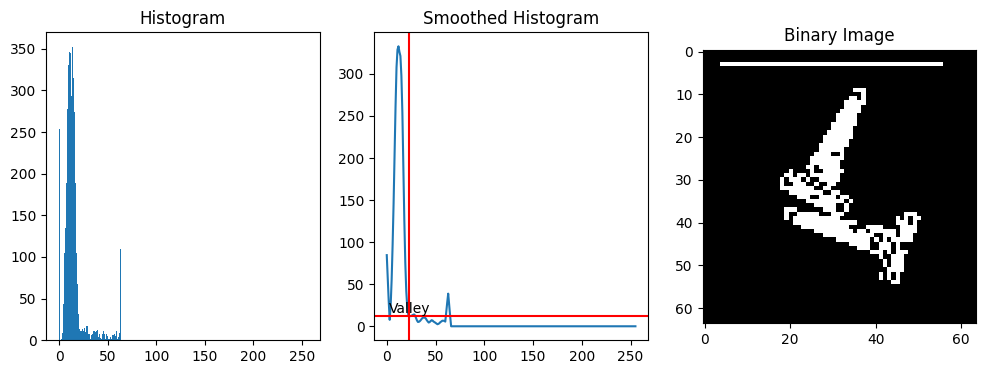

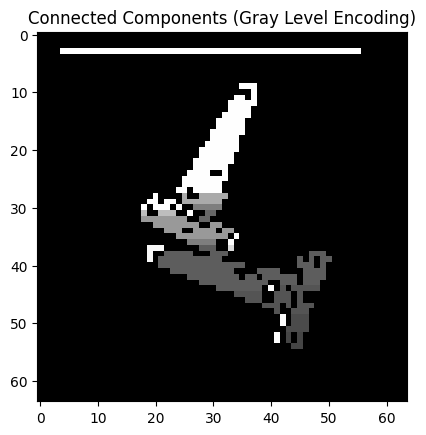

Gray Level to Component Mapping: {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11}




IMAGE -  shapes1.pnm
Threshold -  60


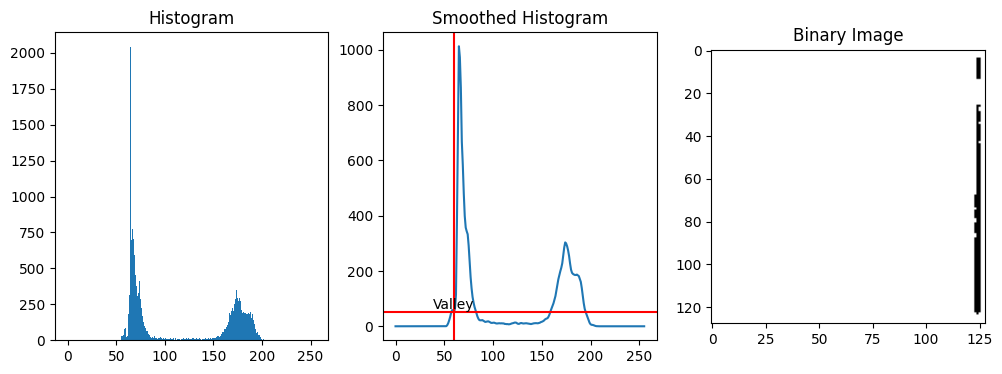

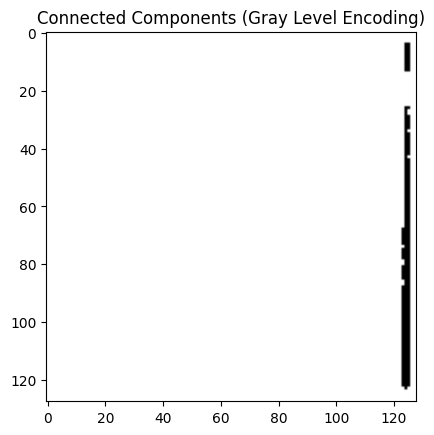

Gray Level to Component Mapping: {1: 1}




IMAGE -  shapes2.pnm
Threshold -  68


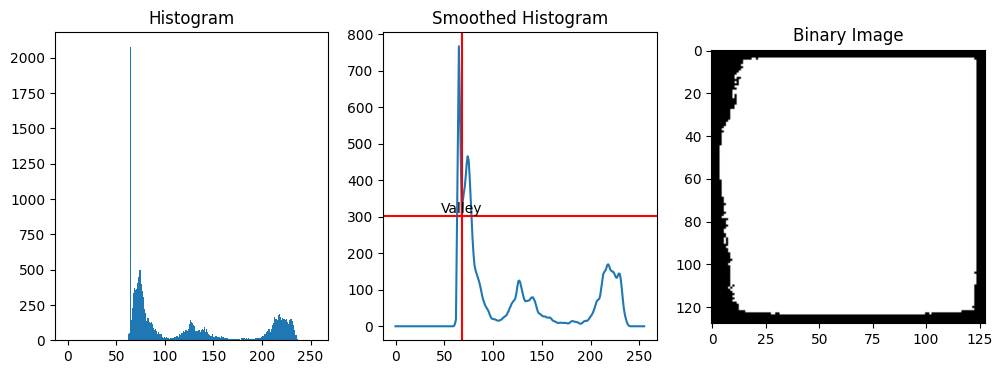

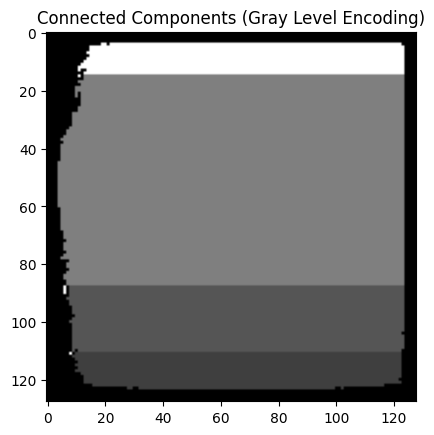

Gray Level to Component Mapping: {1: 1, 2: 2, 3: 3, 4: 4}




IMAGE -  shapes3.pnm
Threshold -  68


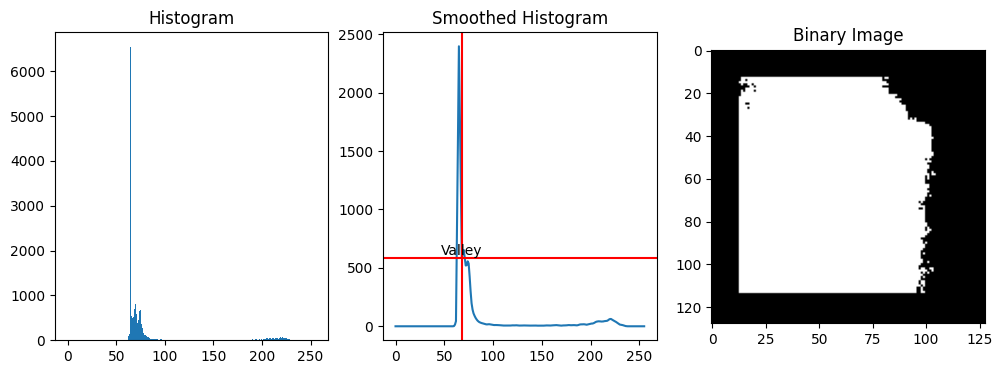

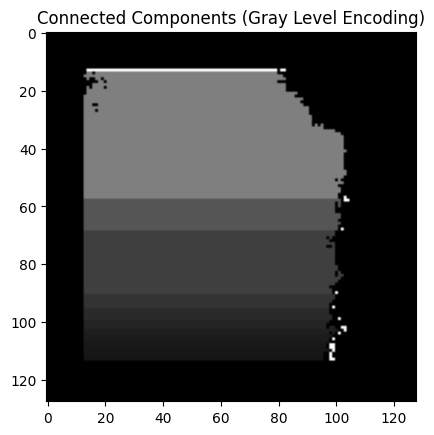

Gray Level to Component Mapping: {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12}




IMAGE -  shapes4.pnm
Threshold -  95


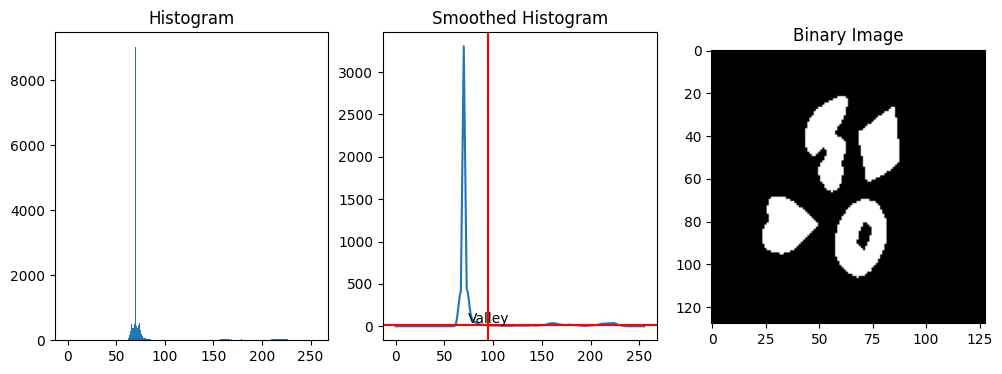

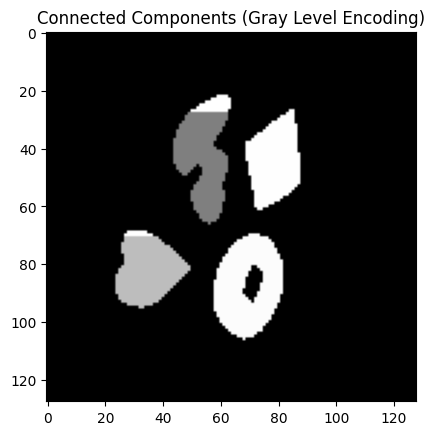

Gray Level to Component Mapping: {1: 1, 2: 2, 3: 3, 4: 4}




IMAGE -  pillsetc.pnm
Threshold -  110


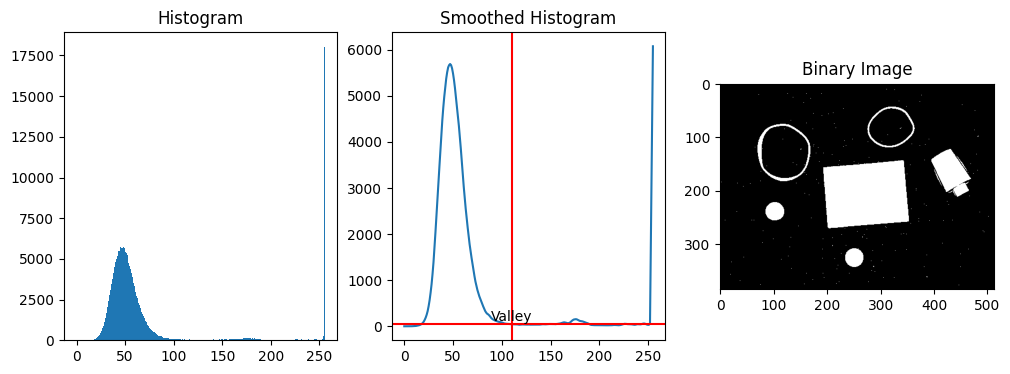

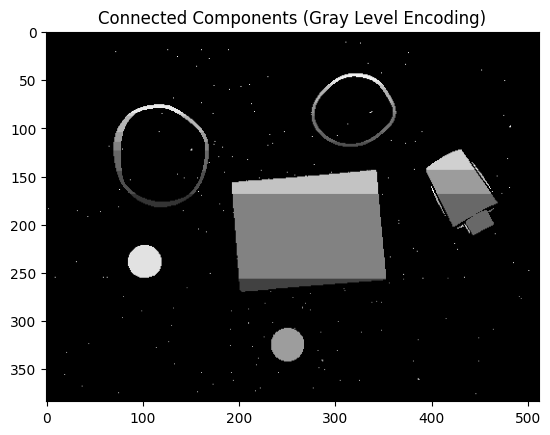

Gray Level to Component Mapping: {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 11

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def connected_components(binary_img):
    # Initialize empty label matrix
    label_img = np.zeros(binary_img.shape, dtype=np.int32)

    # Initialize label counter
    label = 1

    # Loop through binary image
    for row in range(binary_img.shape[0]):
        for col in range(binary_img.shape[1]):
            # Check if pixel is foreground and not yet labeled
            if binary_img[row, col] != 0 and label_img[row, col] == 0:
                # Start a new component with the current label
                label_img[row, col] = label
                component = [(row, col)]

                # Loop through the component's pixels
                while component:
                    # Pop the first pixel from the component list
                    r, c = component.pop(0)

                    # Check 4-connected neighbors
                    for dr, dc in [(1, 0), (0, 1), (-1, 0), (0, -1)]:
                        nr, nc = r + dr, c + dc
                        # Check if neighbor is within image bounds
                        if 0 <= nr < binary_img.shape[0] and 0 <= nc < binary_img.shape[1]:
                            # Check if neighbor is foreground and not yet labeled
                            if binary_img[nr, nc] != 0 and label_img[nr, nc] == 0:
                                # Add neighbor to the current component
                                label_img[nr, nc] = label
                                component.append((nr, nc))

                # Move on to the next label
                label += 1

    return label_img


images = ["hinge.pnm","hinges.pnm","shapes1.pnm","shapes2.pnm","shapes3.pnm","shapes4.pnm","pillsetc.pnm"]

for image in images:
    print("IMAGE - ", image)
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    binary_img = image_segmentation(img)

    # Apply connected component analysis using 4-connected neighbors
    label_img = connected_components(binary_img)

    # Create a new image with the connected components labeled with different gray levels
    gray_img = np.zeros((binary_img.shape[0], binary_img.shape[1]), dtype=np.uint8)
    gray_levels = {}
    for row in range(label_img.shape[0]):
        for col in range(label_img.shape[1]):
            if label_img[row, col] != 0:
                if label_img[row, col] not in gray_levels:
                    gray_levels[label_img[row, col]] = len(gray_levels)+1
                gray_img[row, col] = gray_levels[label_img[row, col]]*(255//len(gray_levels))

    # Display the labeled image
    print()
    plt.imshow(gray_img, cmap='gray')
    plt.title('Connected Components (Gray Level Encoding)')
    plt.show()


    # Print the mapping of gray levels to connected components
    print(f'Gray Level to Component Mapping: {gray_levels}')
    print("\n\n\n")

## component analysis using openCV package

IMAGE -  hinge.pnm
Threshold -  12


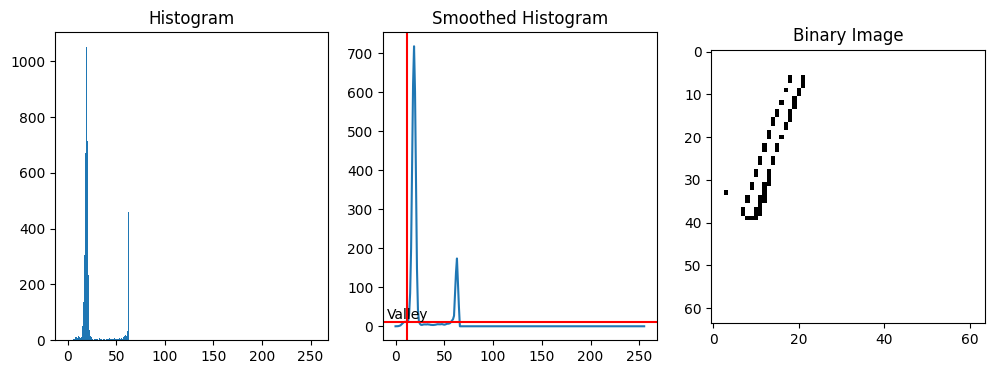

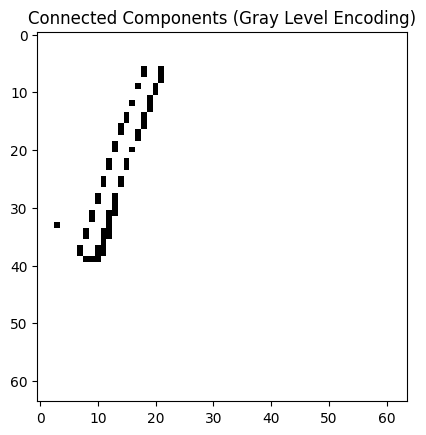

Gray Level to Component Mapping: {1: 1}




IMAGE -  hinges.pnm
Threshold -  23


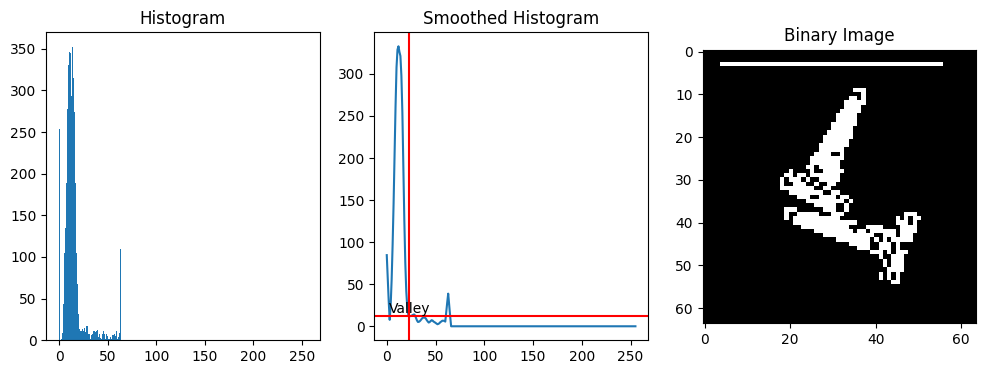

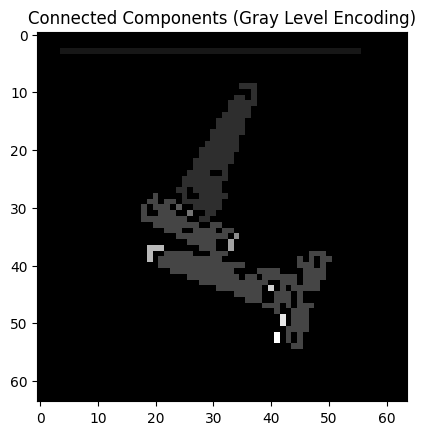

Gray Level to Component Mapping: {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11}




IMAGE -  shapes1.pnm
Threshold -  60


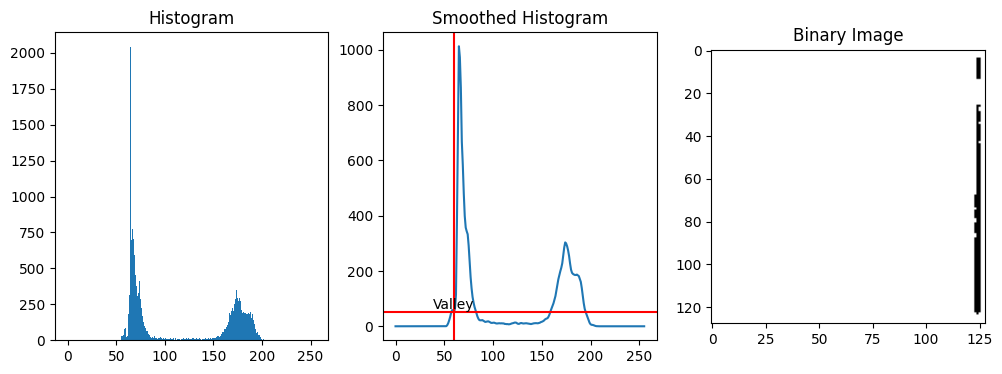

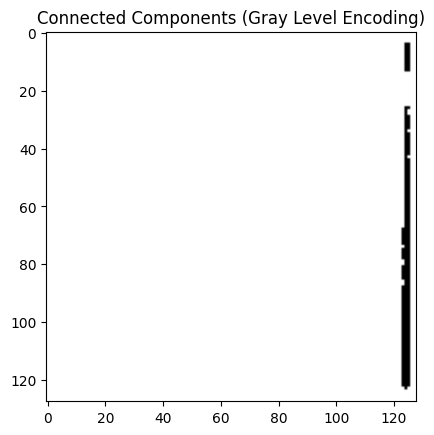

Gray Level to Component Mapping: {1: 1}




IMAGE -  shapes2.pnm
Threshold -  68


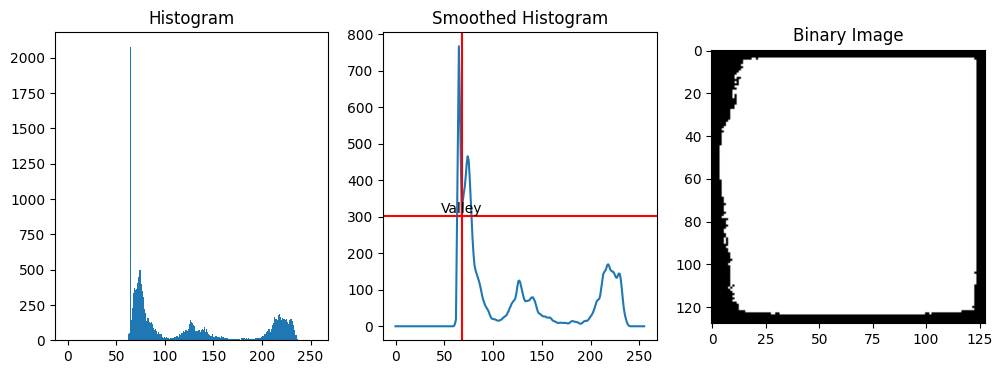

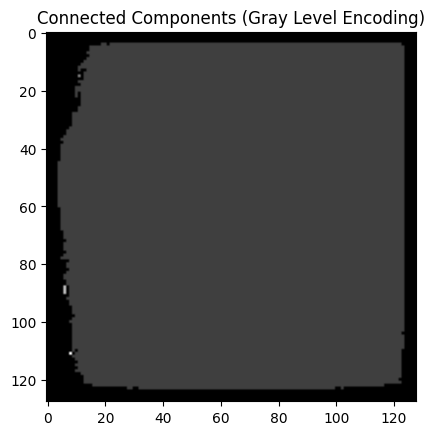

Gray Level to Component Mapping: {1: 1, 2: 2, 3: 3, 4: 4}




IMAGE -  shapes3.pnm
Threshold -  68


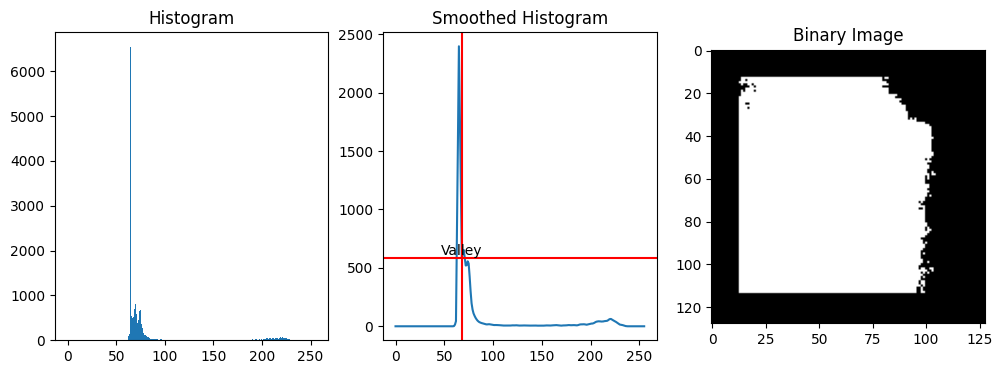

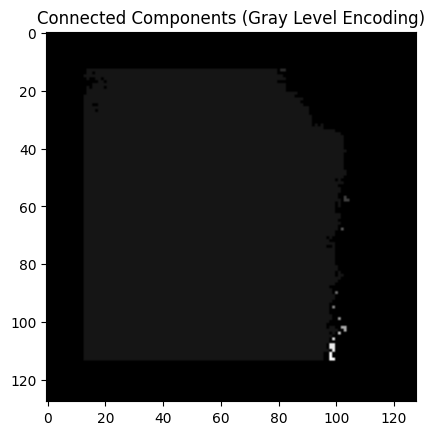

Gray Level to Component Mapping: {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12}




IMAGE -  shapes4.pnm
Threshold -  95


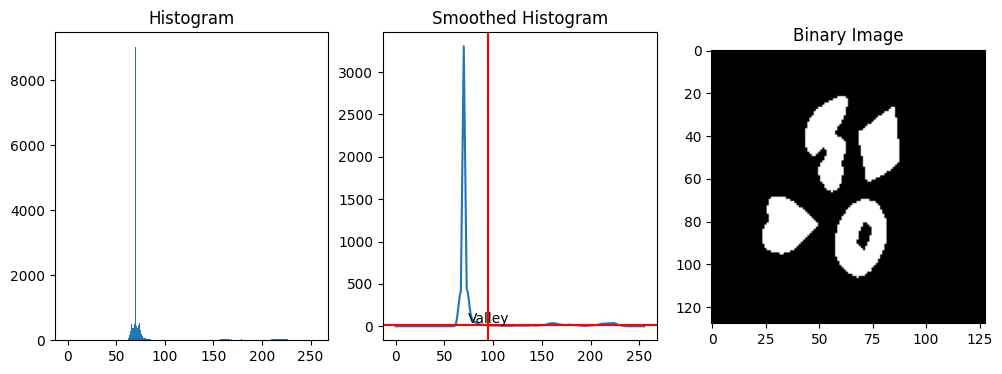

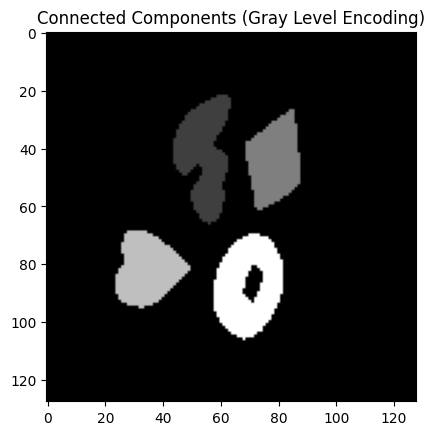

Gray Level to Component Mapping: {1: 1, 2: 2, 3: 3, 4: 4}




IMAGE -  pillsetc.pnm
Threshold -  110


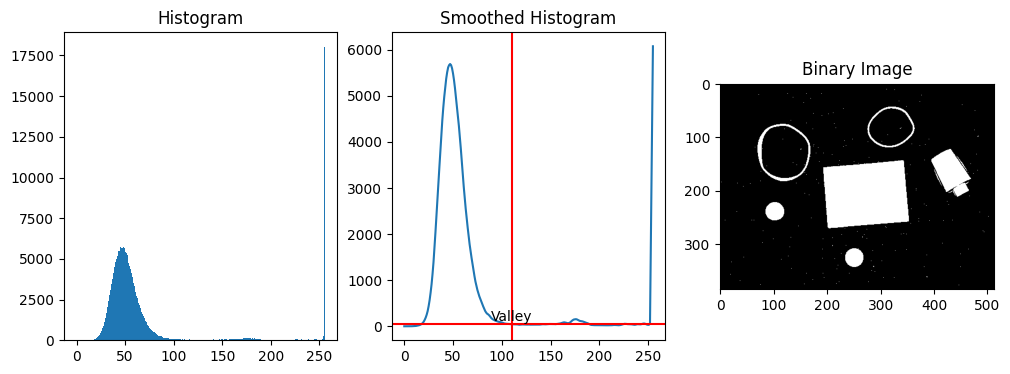

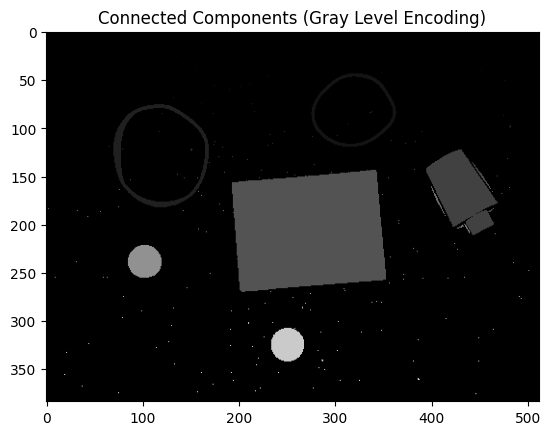

Gray Level to Component Mapping: {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 116: 116, 117: 117, 118: 118, 11

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image

images = ["hinge.pnm","hinges.pnm","shapes1.pnm","shapes2.pnm","shapes3.pnm","shapes4.pnm","pillsetc.pnm"]

for image in images:
    print("IMAGE - ", image)
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
    binary_img = image_segmentation(img)

    # Apply connected component analysis using 4-connected neighbors
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_img, connectivity=4)

    # Create a new image with the connected components labeled with different gray levels
    label_img = np.zeros((binary_img.shape[0], binary_img.shape[1]), dtype=np.uint8)
    for label in range(1, num_labels):
        label_img[labels == label] = label*255//(num_labels-1)

    # Display the labeled image
    plt.imshow(label_img, cmap='gray')
    plt.title('Connected Components (Gray Level Encoding)')
    plt.show()

    # Print the mapping of gray levels to connected components
    print(f'Gray Level to Component Mapping: {dict(zip(range(1, num_labels), range(1, num_labels)))}')
    print("\n\n\n")

# Calculating features of each component in the image

In [ ]:
def compute_features(label):
    # Count the number of unique labels in the label matrix
    num_labels = np.max(label)

    # Initialize an empty list to store features for each component
    features = []

    # Iterate through each label and compute its features
    for i in range(num_labels):
        # Create a mask for the current component
        mask = np.uint8(label == i+1)

        # Compute the area of the current component
        area = np.sum(mask)

        # Compute the centroid of the current component
        moments = cv2.moments(mask)
        centroid_x = int(moments["m10"] / moments["m00"])
        centroid_y = int(moments["m01"] / moments["m00"])

        # Compute the central moments of the current component
        mu = cv2.moments(mask, True)

        # Compute the perimeter of the current component using the findContours function in OpenCV
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        perimeter = cv2.arcLength(contours[0], True)

        # Compute the compactness measure of the current component
        compactness = (perimeter**2) / (4 * np.pi * area)

        # Compute the elongation measure of the current component
        try:
          elongation = ((mu["mu20"] - mu["mu02"])**2 + 4*(mu["mu11"]**2)) / (mu["mu20"] + mu["mu02"])**2
        except:
          continue


        # Add the computed features to the list of features
        features.append({
            "area": area,
            "centroid": (centroid_x, centroid_y),
            "central_moments": mu,
            "perimeter": perimeter,
            "compactness": compactness,
            "elongation": elongation
        })

    return features

for image in images:
  binary = image_segmentation(img)
  # Apply connected component labeling on the binary image
  label = connected_component_labeling(binary)


  # Compute features for each identified component
  features = compute_features(label)

  # Display the computed features
  for i, f in enumerate(features):
    print("Component", i+1, "features:")
    print("  Area:", f["area"])
    print("  Centroid:", f["centroid"])
    print("  Central moments" ,f["central_moments"])
    print("  perimeter" ,f["perimeter"])
    print("  compactness" ,f["compactness"])
    print("  elongation" ,f["elongation"])






Component 1 features:
  Area: 4
  Centroid: (393, 151)
  Central moments {'m00': 4.0, 'm10': 1573.0, 'm01': 606.0, 'm20': 636913.0, 'm11': 261838.0, 'm02': 122010.0, 'm30': 263450449.0, 'm21': 113158426.0, 'm12': 52748968.0, 'm03': 24605418.0, 'mu20': 18330.75, 'mu11': 23528.5, 'mu02': 30201.0, 'mu30': -1432723.125, 'mu21': -1839058.75, 'mu12': -2360600.0, 'mu03': -3030000.0, 'nu20': 1145.671875, 'nu11': 1470.53125, 'nu02': 1887.5625, 'nu30': -44772.59765625, 'nu21': -57470.5859375, 'nu12': -73768.75, 'nu03': -94687.5}
  perimeter 3.414213538169861
  compactness 0.2319057435506172
  elongation 0.999971692298514
Component 2 features:
  Area: 8
  Centroid: (420, 179)
  Central moments {'m00': 8.0, 'm10': 3363.0, 'm01': 1432.0, 'm20': 1427397.0, 'm11': 622983.0, 'm02': 288596.0, 'm30': 610258455.0, 'm21': 271196391.0, 'm12': 125815167.0, 'm03': 58566628.0, 'mu20': 13675.875, 'mu11': 21006.0, 'mu02': 32268.0, 'mu30': -1281550.78125, 'mu21': -1968466.5, 'mu12': -3023524.5, 'mu03': -4644000.

## Without using inbuilt functions

In [ ]:

# Compute the area of each component
def compute_area(component):
    return np.sum(component)

# Compute the centroid of each component
def compute_centroid(component):
    rows, cols = component.shape
    x = np.sum(np.dot(np.arange(cols), np.sum(component, axis=0))) / np.sum(component)
    y = np.sum(np.dot(np.arange(rows), np.sum(component, axis=1))) / np.sum(component)
    return x, y

# Compute the second order moments around the centroid of each component
def compute_moments(component):
    rows, cols = component.shape
    x_bar, y_bar = compute_centroid(component)
    xx = np.sum(np.dot((np.arange(cols)-x_bar)**2, np.sum(component, axis=0))) / np.sum(component)
    xy = np.sum(np.dot(np.dot(np.arange(cols)-x_bar, np.arange(rows)-y_bar), component))
    yy = np.sum(np.dot((np.arange(rows)-y_bar)**2, np.sum(component, axis=1))) / np.sum(component)
    return xx, xy, yy

# Compute the perimeter of each component
def compute_perimeter(component):
    # Dilate the component to fill any gaps
    kernel = np.ones((3,3), np.uint8)
    dilated = cv2.dilate(component.astype(np.uint8), kernel, iterations=1)
    # Find the contours of the dilated component
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Compute the perimeter as the sum of contour lengths
    perimeter = 0
    for contour in contours:
        perimeter += cv2.arcLength(contour, closed=True)
    return perimeter

# Compute the compactness measure of each component
def compute_compactness(component):
    area = compute_area(component)
    perimeter = compute_perimeter(component)
    return perimeter**2 / (4*np.pi*area)

# Compute the elongation measure of each component
def compute_elongation(component):
    xx, xy, yy = compute_moments(component)
    theta = np.arctan2(2*xy, xx-yy) / 2
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    a = (xx*cos_theta**2 + 2*xy*cos_theta*sin_theta + yy*sin_theta**2) / np.sum(component)
    b = (xx*sin_theta**2 - 2*xy*cos_theta*sin_theta + yy*cos_theta**2) / np.sum(component)
    return np.sqrt((a-b)**2 + 4*xy**2/np.sum(component)**2)

def compute_features(label):
    # Count the number of unique labels in the label matrix
    num_labels = np.max(label)

    # Initialize an empty list to store features for each component
    features = []

    # Iterate through each label and compute its features
    for i in range(num_labels):
        # Create a mask for the current component
        mask = np.uint8(label == i+1)

    # Add the computed features to the list of features
        features.append({
            "area": compute_area(mask),
            "central_moments": compute_moments(component),
            "centroid": compute_centroid(component),
            "perimeter": compute_perimeter(component),
            "compactness": compute_compactness(component),
            "elongation": compute_elongation(component)
        })

    return features

for image in images:
  binary = image_segmentation(img)
  # Apply connected component labeling on the binary image
  label = connected_component_labeling(binary)
  # Compute features for each identified component
  features = compute_features(label)

  # Display the computed features
  for i, f in enumerate(features):
    print("Component", i+1, "features:")
    print("  Area:", f["area"])
    print("  Centroid:", f["centroid"])
    print("  Central moments" ,f["central_moments"])
    print("  perimeter" ,f["perimeter"])
    print("  compactness" ,f["compactness"])
    print("  elongation" ,f["elongation"])

ValueError: ignored